**FINAL PROJECT - CARDANO - 2021**


# Import library

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Dataset

In [ ]:
uploded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
#read data from uploded file csv into dataframe
df_raw = pd.read_csv(io.BytesIO(uploded['weatherAUS.csv']))

# Exploratory Data Analysis

## Identify basic information dataset

In [ ]:
# View the first 5 samples of the dataset
df_raw.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#general information about the data each colomn
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#size of data... there are 3.345.580 of elements
df_raw.size

3345580

In [ ]:
# check shape of data
df_raw.shape

(145460, 23)

In [ ]:
# Identification all column listed
df_raw.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#cek data null/nan --> data klimatogi dengan nilai null/nan bukan berarti harus dihapus, tapi memang wajar 

df_raw.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
#describe the general statistic of data
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


## Identify Data Categorical values

In [ ]:
# Checking data categorical
print("location :", df_raw['Location'].unique())
print("WindGustDir :", df_raw['WindGustDir'].unique())
print("WindDir9am :", df_raw['WindDir9am'].unique())
print("WindDir3pm :", df_raw['WindDir3pm'].unique())
print("RainToday :", df_raw['RainToday'].unique())
print("RainTomorrow :", df_raw['RainTomorrow'].unique())

location : ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir : ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindDir9am : ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm : ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday : ['No' 'Yes' nan]
RainTomorrow : ['No' 'Yes' nan]


In [ ]:
# Checking the label counts data categorical
print("location :", df_raw['Location'].value_counts())
print("WindGustDir :", df_raw['WindGustDir'].value_counts())
print("WindDir9am :", df_raw['WindDir9am'].value_counts())
print("WindDir3pm :", df_raw['WindDir3pm'].value_counts())
print("RainToday :", df_raw['RainToday'].value_counts())
print("RainTomorrow :", df_raw['RainTomorrow'].value_counts())

location : Canberra            3436
Sydney              3344
Brisbane            3193
Perth               3193
Adelaide            3193
Darwin              3193
Hobart              3193
Melbourne           3193
Wollongong          3040
GoldCoast           3040
Albury              3040
Townsville          3040
Ballarat            3040
MountGinini         3040
Cairns              3040
MountGambier        3040
AliceSprings        3040
Albany              3040
Launceston          3040
Bendigo             3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
Watsonia            3009
Cobar               3009
MelbourneAirport    3009
Williamtown         3009
PerthAirport        3009
Woomera             3009
PearceRAAF          3009
NorfolkIsland       3009
Portland            3009
CoffsHarbour        3009
WaggaWagga          3009
Nuriootpa           3009
SydneyAirport       3009
Moree               3009
Richmond            3009
Dartmoor            3009
BadgerysCreek 

## Correlation Plot

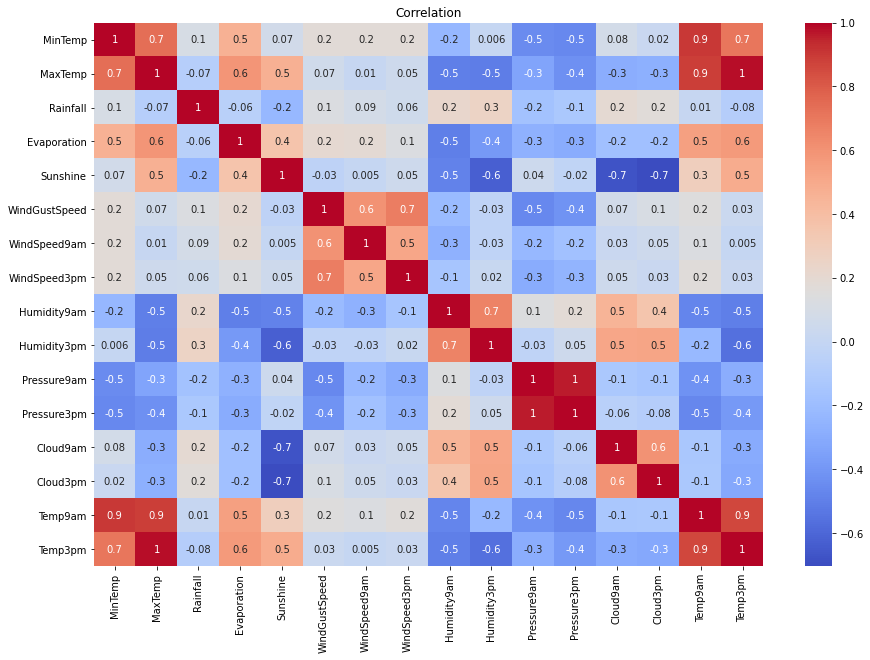

In [ ]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
plt.title('Correlation')
sns.heatmap(df_raw.corr(), annot=True, fmt='.1g', cmap="coolwarm");

## Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

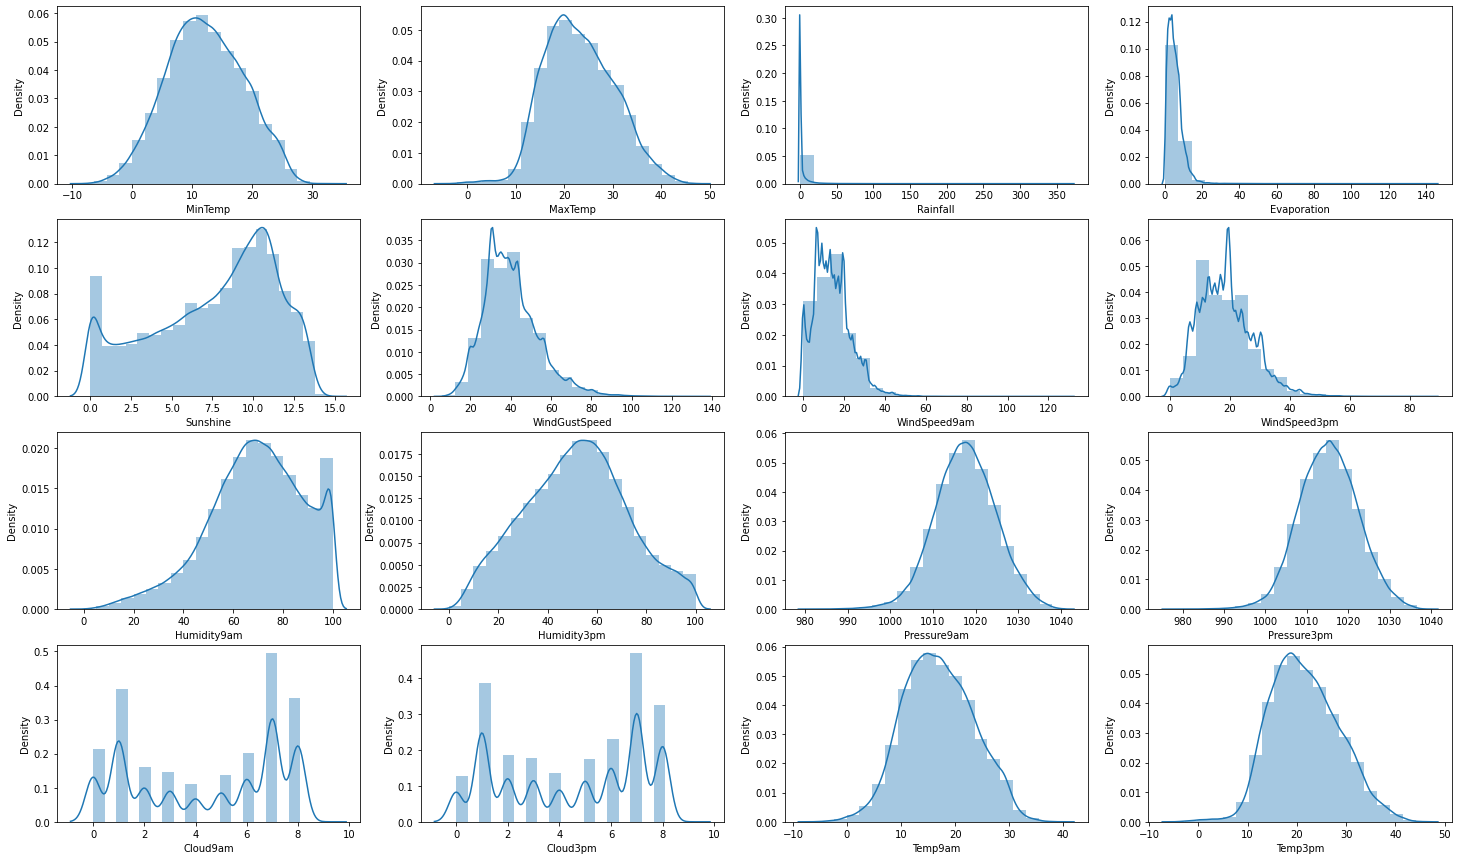

In [ ]:
# ploting distribution data each column numerics
fig, axes = plt.subplots(4, 4, figsize=(25, 15))
sns.distplot(df_raw['MinTemp'], bins=20, kde=True, ax=axes[0, 0])
sns.distplot(df_raw['MaxTemp'], bins=20, kde=True, ax=axes[0, 1])
sns.distplot(df_raw['Rainfall'], bins=20, kde=True, ax=axes[0, 2])
sns.distplot(df_raw['Evaporation'], bins=20, kde=True, ax=axes[0, 3])

sns.distplot(df_raw['Sunshine'], bins=20, kde=True, ax=axes[1, 0])
sns.distplot(df_raw['WindGustSpeed'], bins=20, kde=True, ax=axes[1, 1])
sns.distplot(df_raw['WindSpeed9am'], bins=20, kde=True, ax=axes[1, 2])
sns.distplot(df_raw['WindSpeed3pm'], bins=20, kde=True, ax=axes[1, 3])

sns.distplot(df_raw['Humidity9am'], bins=20, kde=True, ax=axes[2, 0])
sns.distplot(df_raw['Humidity3pm'], bins=20, kde=True, ax=axes[2, 1])
sns.distplot(df_raw['Pressure9am'], bins=20, kde=True, ax=axes[2, 2])
sns.distplot(df_raw['Pressure3pm'], bins=20, kde=True, ax=axes[2, 3])

sns.distplot(df_raw['Cloud9am'], bins=20, kde=True, ax=axes[3, 0])
sns.distplot(df_raw['Cloud3pm'], bins=20, kde=True, ax=axes[3, 1])
sns.distplot(df_raw['Temp9am'], bins=20, kde=True, ax=axes[3, 2])
sns.distplot(df_raw['Temp3pm'], bins=20, kde=True, ax=axes[3, 3])

## Identify Outliers Data

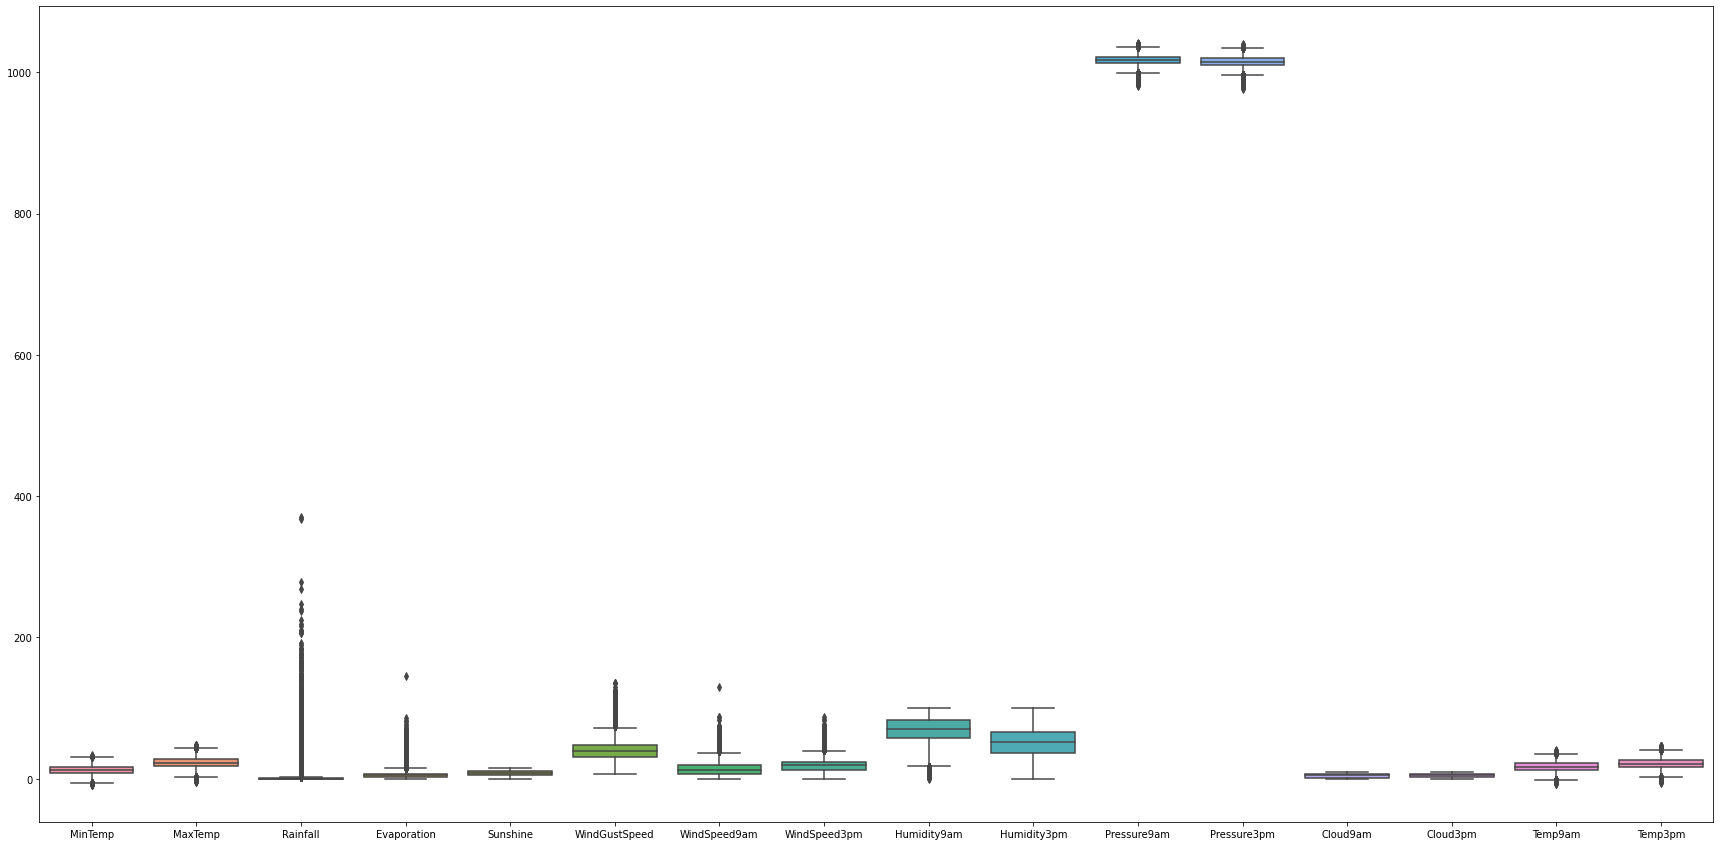

In [ ]:
# Identification outliers data from all features

fig = plt.figure(figsize=(30,15))
sns.boxplot(data =df_raw)

## Counting in percentage missing values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Percentage of Nan Values each features')

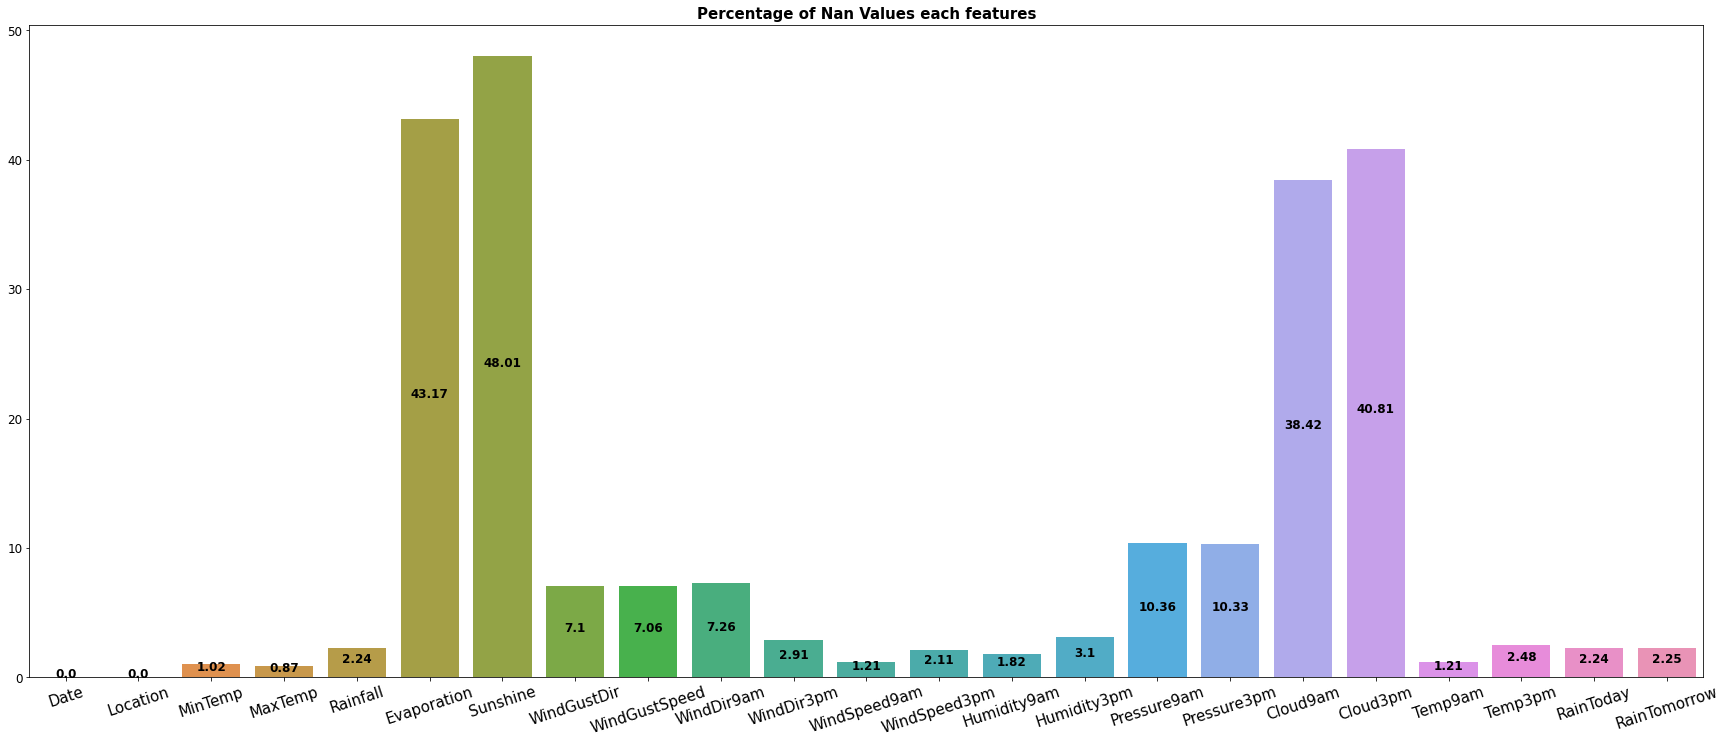

In [ ]:
# variable percentage of na
na_values = df_raw.isnull().sum()/len(df_raw)*100

#intiate plot
plt.figure(figsize = (30,12))
ax = sns.barplot(na_values.index, na_values)

# iterate over every x and y and annotate the value inside of the barchart
for i in range(len(na_values)):
  ax.text(i, na_values[i]/2, str(round(na_values[i],2)),
  fontdict = dict(color = 'black', fontsize = 12, fontweight = 'bold'),
  horizontalalignment = 'center')

# set x & y label
ax.tick_params(axis='x', labelrotation=18, labelsize=15)
ax.tick_params(axis='y', labelsize=12)

# set a title for the plot
ax.set_title('Percentage of Nan Values each features', fontsize=15, fontweight='bold')

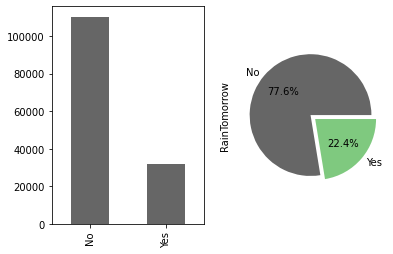

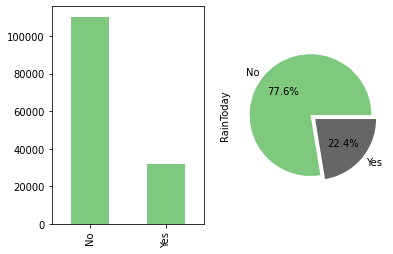

In [ ]:
# Distribution of the Target variable
fig, ax = plt.subplots(1,2)
df_raw['RainTomorrow'].value_counts().plot(kind='bar', ax=ax[0], cmap='Accent_r')
df_raw['RainTomorrow'].value_counts().plot(kind='pie', ax=ax[1], cmap='Accent_r', autopct='%.1f%%', explode=[0, 0.1])

fig, ax = plt.subplots(1,2)
df_raw['RainToday'].value_counts().plot(kind='bar', ax=ax[0], cmap='Accent')
df_raw['RainToday'].value_counts().plot(kind='pie', ax=ax[1], cmap='Accent', autopct='%.1f%%', explode=[0, 0.1])

# Data Pre-Processing

## Handling Missing Value


In [ ]:
# check duplicated data
df = df_raw
print(df.duplicated().sum())

0


In [ ]:
# grouping column features categorics type
categorics = [x for x in df.columns if df[x].dtype=='object']
print(categorics)

# grouping column features numerics type
numerics = [x for x in df.columns if df[x].dtype=='float64']
print(numerics)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
# fill na for numerics variables
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].median())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].median())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].median())

In [ ]:
# fill na for categorics variables
df['WindGustDir'] = df['WindGustDir'].fillna(df["WindGustDir"].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df["WindDir9am"].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df["WindDir3pm"].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df["RainToday"].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df["RainTomorrow"].mode()[0])

In [ ]:
# Checking any missing values
df[df.isnull().any(axis = 1)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


## Maaping Value Rain Today and Rain Tomorrow

In [ ]:
# Mapping value for some categorical features

df_raw['RainTomorrow'] = df_raw['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_raw['RainToday'] = df_raw['RainToday'].map({'Yes': 1, 'No': 0})

In [ ]:
df_raw.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


## Feature Engineering

In [ ]:
#feature engineering
df['CloudyAllDay'] = (df.RainToday == 0 ) & (df.Cloud3pm == df.Cloud9am)
df['CloudyAllDay'] = df['CloudyAllDay'].map({True: 1, False: 0})

df['LightRain'] = (df.RainToday == 1) & ((df.Rainfall >= 5) & (df.Rainfall <= 20))
df['LightRain'] = df['LightRain'].map({True: 1, False: 0})
df['IsNormalRain'] = (df.RainToday == 1) & ((df.Rainfall >= 20) & (df.Rainfall <= 50))
df['IsNormalRain'] = df['IsNormalRain'].map({True: 1, False: 0})
df['IsHeavyRain'] = (df.RainToday == 1 ) & ((df.Rainfall >= 50) & (df.Rainfall <= 100))
df['IsHeavyRain'] = df['IsHeavyRain'].map({True: 1, False: 0})
df['IsThunderstrom'] = (df.RainToday == 1 ) & ((df.Rainfall >= 50) & (df.Rainfall <= 100))
df['IsThunderstrom'] = df['IsThunderstrom'].map({True: 1, False: 0})
df['CloudyAllDay'] = (df.RainToday == 0 ) & (df.Cloud3pm == df.Cloud9am)
df['CloudyAllDay'] = df['CloudyAllDay'].map({True: 1, False: 0})

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,CloudyAllDay,LightRain,IsNormalRain,IsHeavyRain,IsThunderstrom
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,0,0,0,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,0,0,0,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,0,0,0,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,0,0,0,0,0


## Spliting Dataset

In [ ]:
#spliting dataset
X = df.drop(['Date', 'RainTomorrow', 'Location'], axis = 1)
y = df['RainTomorrow']

display(X)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,CloudyAllDay,LightRain,IsNormalRain,IsHeavyRain,IsThunderstrom
0,13.4,22.9,0.6,4.8,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,0,0,0,0
1,7.4,25.1,0.0,4.8,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,0,0,0,0
2,12.9,25.7,0.0,4.8,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,0,0,0,0
3,9.2,28.0,0.0,4.8,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,4.8,7.611178,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,0,0,0,0
145456,3.6,25.3,0.0,4.8,7.611178,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,0,0,0,0
145457,5.4,26.9,0.0,4.8,7.611178,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,0,0,0,0
145458,7.8,27.0,0.0,4.8,7.611178,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,0,0,0,0


## Encoder data features

In [ ]:
# One hot encoding
X = pd.get_dummies(X)
display(X)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,CloudyAllDay,LightRain,IsNormalRain,IsHeavyRain,IsThunderstrom,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,4.8,7.611178,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,4.8,7.611178,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,4.8,7.611178,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
145458,7.8,27.0,0.0,4.8,7.611178,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Encoder data target

In [ ]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
display(y)

array([0, 0, 0, ..., 0, 0, 0])

## Train Test Validation

In [ ]:
# Split dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 123)

# Build Model

## Standarization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X_train)
X_scaler = pd.DataFrame(X_scaler,columns = X_train.columns)

In [ ]:
def evaluasi(model,X_test,y_test):
    from sklearn.metrics import accuracy_score

    X_scaler_test = scaler.transform(X_test)
    y_pred = model.predict(X_scaler_test)
    
    return accuracy_score(y_test,y_pred)*100
    

In [ ]:
def prediksi(model,X_test):
    X_scaler = scaler.transform(X_test)
    return model.predict(X_scaler)
     

## Decision Tree Classifier

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=5)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_test_pred = dectree.predict(X_test)
print('Accuracy score :', accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy score : 0.8375727576882533
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     34075
           1       0.71      0.44      0.54      9563

    accuracy                           0.84     43638
   macro avg       0.78      0.69      0.72     43638
weighted avg       0.83      0.84      0.82     43638



In [ ]:
def search_tree(X_train, X_test, y_train, y_test, max_depths):
    acc_train = []
    acc_test = []
    for depth in max_depths:
        # Train based on tree's depth
        classifier = DecisionTreeClassifier(criterion='entropy', random_state=0,
                                            max_depth=depth)
        classifier.fit(X_train, y_train)
        
        # Predict the result
        y_test_pred = classifier.predict(X_test)
        
        # Training Performance

        # Test Performance
        score_test = accuracy_score(y_test, y_test_pred)
        acc_test.append(score_test)

    result = pd.DataFrame({'depths': max_depths,  'acc_test': acc_test})

    plt.figure(figsize=(12, 8))
    plt.title('Decision Tree Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Max Depths')
    sns.lineplot(data=result, x='depths', y='acc_test')
    plt.grid()
    plt.xticks(result['depths'])
    plt.show()

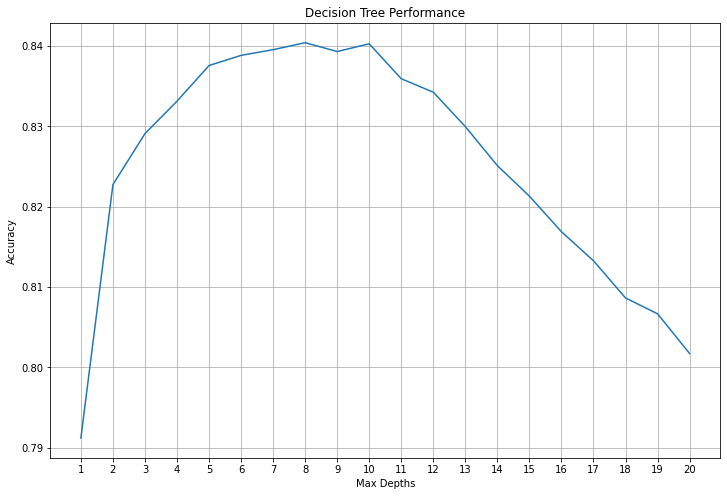

In [ ]:
search_tree(X_train, X_test, y_train, y_test, max_depths=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

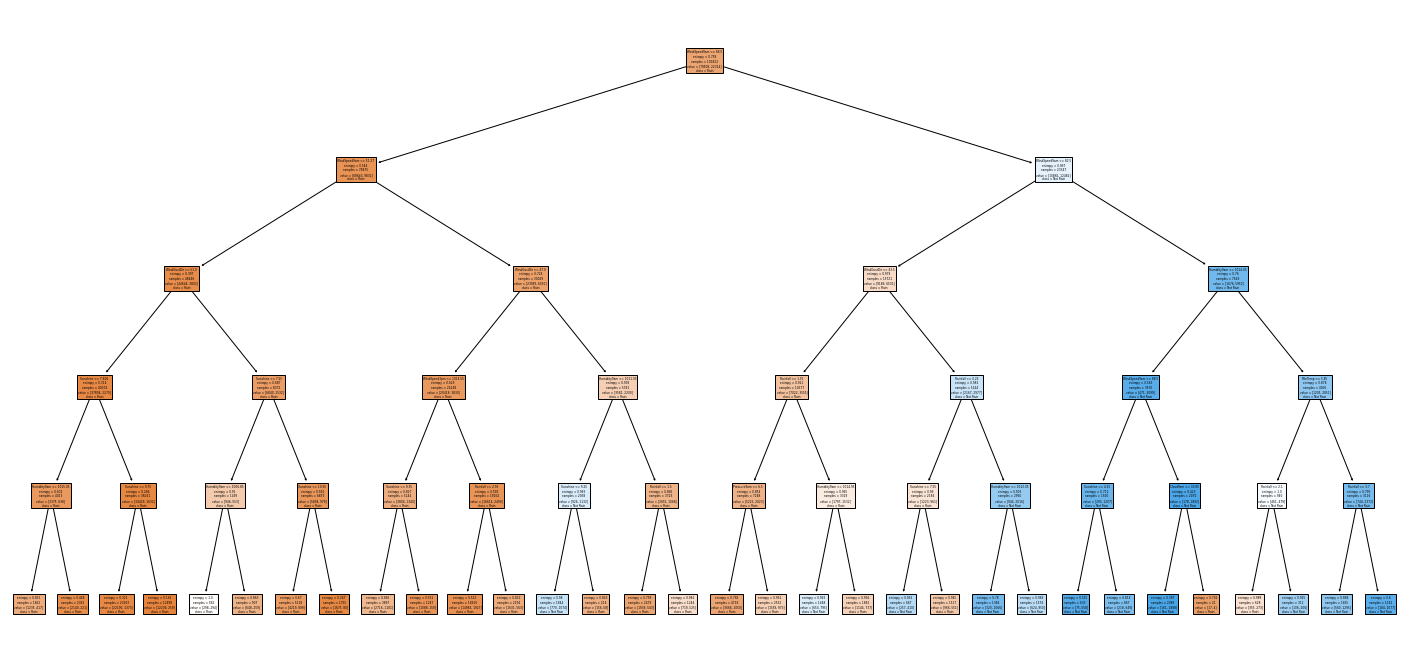

In [ ]:
# Visualize Decision Tree
from sklearn import tree

plt.figure(figsize=(25,12))
tree.plot_tree(dectree, feature_names=X.columns,
               class_names=['Rain', 'Not Rain'],
               filled=True)
plt.show()

In [ ]:
df_feature_imp = pd.DataFrame([X_train.columns,dectree.feature_importances_]).transpose()
df_feature_imp.columns = ['feature','feature_score']

In [ ]:
df_feature_imp = df_feature_imp.sort_values(by='feature_score',ascending=False)

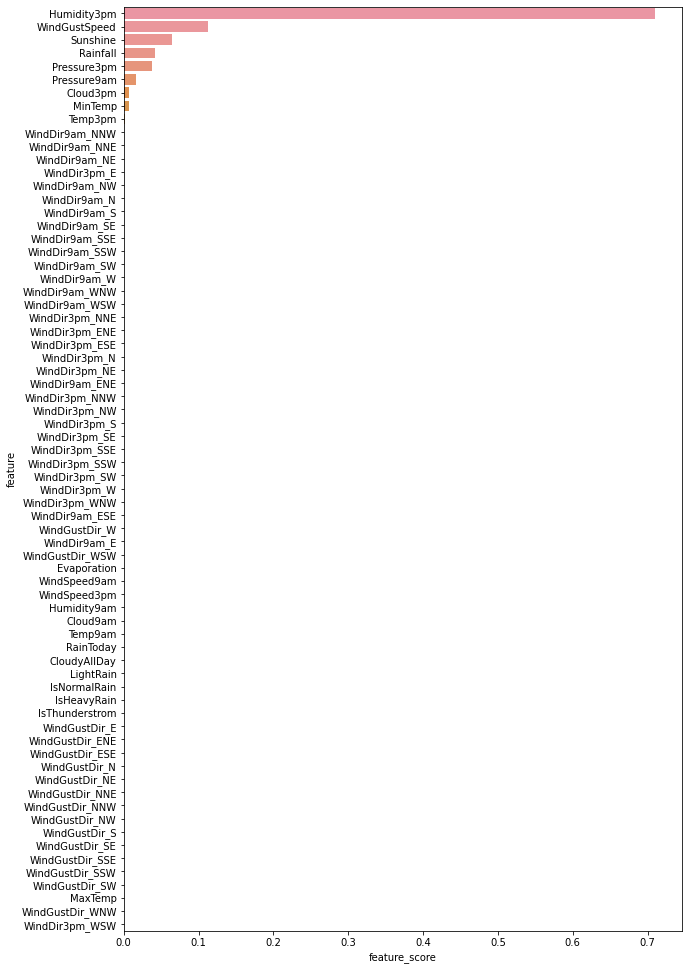

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 17))
sns.barplot(x='feature_score',y='feature',data= df_feature_imp)
plt.show()

In [ ]:
params ={'max_depth':[1,3,5,8,10,20,'max']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=dectree, # model yang akan digunakan
             param_grid=params, # hyperparameter yang dipilih
             scoring = 'accuracy', # metrics evaluation
             n_jobs = 10, # core cpu yang digunakan
             cv = 3 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=10,
             param_grid={'max_depth': [1, 3, 5, 8, 10, 20, 'max']},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [ ]:
grid.best_params_

{'max_depth': 8}

In [ ]:
grid.best_score_

0.840594395229764

In [ ]:
evaluasi(dectree,X_test,y_test)

78.08561345616206

In [ ]:
accuracy = evaluasi(grid,X_test,y_test)
print('accuracy : {0:.5f}%'.format(accuracy))

accuracy : 78.08561%


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=10, n_estimators=70, random_state=2)  # Hyperparameters 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'max_depth':[5,10,15,20,30],
              'random_state': [0,1,2,3,4],
              'n_estimators':[10,30,50,70,100,150] 
             }  # dictionary of parameters.  5x5x6 = 150.

grid = GridSearchCV(model,parameters,cv=5,verbose=1)
#grid = RandomizedSearchCV(model,parameters,cv=5)
grid.fit(X,y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=70, n_jobs=None,
                                              oob_score=False, random_state=2,
                                      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
accuracy_score(y_test,prediction)

0.9424242424242424

In [ ]:
print('accuracy : {0:.5f}%'.format(accuracy_score(y_test, prediction)))

accuracy : 0.94242%


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       166
           1       0.93      0.95      0.94       164

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)


{'max_depth': 10, 'n_estimators': 10, 'random_state': 4}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)
0.952


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)


In [ ]:
evaluasi(log_regression,X_test,y_test)

33.53040927631881

# Feature Selection

## Decision Tree with Feature Important

In [ ]:
list_feature_imp = ['Humidity3pm','WindGustSpeed', 'Sunshine',
                     'Rainfall', 'Pressure3pm', 'Pressure9am',
                    'Cloud3pm', 'MinTemp']

In [ ]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X_train[list_feature_imp])
X_scaler = pd.DataFrame(X_scaler,columns = X_train[list_feature_imp].columns)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_scaler[list_feature_imp],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
evaluasi(dectree,X_test[list_feature_imp],y_test)

77.93207754709198

Accuracy  0.8375727576882533
Precision  0.7829693084083247
Recall  0.6948111074651946
Confusion matrix  [[32336  1739]
 [ 5349  4214]]


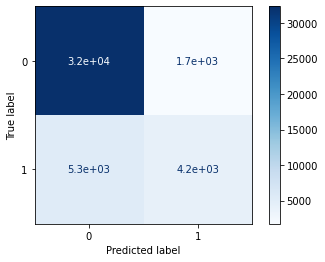

In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

print('Accuracy ',metrics.accuracy_score(y_test, y_test_pred))    
print('Precision ',metrics.precision_score(y_test, y_test_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_test_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_test_pred)) 
plot_confusion_matrix(dectree, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Logistic Regression with ANOVA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif 

filter = SelectKBest(f_classif, k=8)
X_new = filter.fit_transform(X_new,y)

print(X.shape) #sebelum feature selection
print(X_new.shape) # sesudah feature selection

#untuk melihat score
print('Score :', filter.scores_)


In [ ]:
display(X)

In [ ]:
plt.figure(figsize=(20, 15))
plt.bar(range(len(filter.scores_)), filter.scores_)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

In [ ]:
evaluasi(log_regression,X_test,y_test)

In [ ]:
my_predictions = log_regression.predict(X_test)


In [ ]:
dict1 = {'Actual': y_test,
         'Model_prediction': my_predictions}

df = pd.DataFrame(data=dict1)
df

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
confusion_matrix(y_true=y_test, y_pred=my_predictions)
pd.crosstab(y_test, my_predictions)
print ("accuracy score is:", accuracy_score(y_true=y_test, y_pred=my_predictions))
print ("precisions is: ", precision_score(y_test, my_predictions))
print ("recall is ", recall_score(y_test, my_predictions))
print ("f 1 score: ", f1_score(y_test, my_predictions))

# Model and Evaluation

## Decision Tree 

## Logistic Regression